In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/speech-accent-archive/reading-passage.txt
/kaggle/input/speech-accent-archive/speakers_all.csv
/kaggle/input/speech-accent-archive/recordings/recordings/spanish47.mp3
/kaggle/input/speech-accent-archive/recordings/recordings/english220.mp3
/kaggle/input/speech-accent-archive/recordings/recordings/arabic64.mp3
/kaggle/input/speech-accent-archive/recordings/recordings/russian7.mp3
/kaggle/input/speech-accent-archive/recordings/recordings/dutch36.mp3
/kaggle/input/speech-accent-archive/recordings/recordings/english518.mp3
/kaggle/input/speech-accent-archive/recordings/recordings/bengali5.mp3
/kaggle/input/speech-accent-archive/recordings/recordings/english52.mp3
/kaggle/input/speech-accent-archive/recordings/recordings/arabic11.mp3
/kaggle/input/speech-accent-archive/recordings/recordings/farsi11.mp3
/kaggle/input/speech-accent-archive/recordings/recordings/khmer7.mp3
/kaggle/input/speech-accent-archive/recordings/recordings/french41.mp3
/kaggle/input/speech-accent-archive/r

# **Data Pre-Processing**

In [2]:
import pandas as pd       
import os 
import math 
import numpy as np
import matplotlib.pyplot as plt  
import librosa
import os
import seaborn as sns
from IPython.display import Audio
import IPython.display

In [3]:
df = pd.read_csv("/kaggle/input/speech-accent-archive/speakers_all.csv")
df.head(5)

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,24.0,12.0,"koussi, senegal",balanta,balanta,male,788,senegal,True,NaN,NaN,NaN
1,18.0,10.0,"buea, cameroon",cameroon,cameroon,male,1953,cameroon,True,NaN,NaN,NaN
2,48.0,8.0,"hong, adamawa, nigeria",fulfulde,fulfulde,male,1037,nigeria,True,NaN,NaN,NaN
3,42.0,42.0,"port-au-prince, haiti",haitian,haitian,male,1165,haiti,True,NaN,NaN,NaN
4,40.0,35.0,"port-au-prince, haiti",haitian,haitian,male,1166,haiti,True,NaN,NaN,NaN


In [4]:
df.tail(5)

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
2167,46.0,5.0,"lagos, nigeria",yoruba3,yoruba,female,766,nigeria,False,NaN,NaN,NaN
2168,46.0,12.0,"lagos, nigeria",yoruba4,yoruba,male,851,nigeria,False,NaN,NaN,NaN
2169,47.0,2.0,"ibadan, nigeria",yoruba5,yoruba,female,2023,nigeria,False,NaN,NaN,NaN
2170,31.0,1.0,"bethel, alaska, usa",yupik1,yupik,female,571,usa,False,NaN,NaN,NaN
2171,24.0,14.0,"bulawayo, zimbabwe",zulu1,zulu,female,406,zimbabwe,False,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2172 non-null   float64
 1   age_onset        2172 non-null   float64
 2   birthplace       2168 non-null   object 
 3   filename         2172 non-null   object 
 4   native_language  2172 non-null   object 
 5   sex              2172 non-null   object 
 6   speakerid        2172 non-null   int64  
 7   country          2167 non-null   object 
 8   file_missing?    2172 non-null   bool   
 9   Unnamed: 9       0 non-null      float64
 10  Unnamed: 10      0 non-null      float64
 11  Unnamed: 11      1 non-null      object 
dtypes: bool(1), float64(4), int64(1), object(6)
memory usage: 188.9+ KB


In [6]:
df.shape

(2172, 12)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2172.0,33.117173,14.453039,0.0,22.00,28.0,41.00,97.0
age_onset,2172.0,8.833333,8.451127,0.0,0.00,8.0,13.00,86.0
speakerid,2172.0,1088.449355,628.420329,1.0,543.75,1088.5,1632.25,2176.0
Unnamed: 9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 10,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isnull().sum()

age                   0
age_onset             0
birthplace            4
filename              0
native_language       0
sex                   0
speakerid             0
country               5
file_missing?         0
Unnamed: 9         2172
Unnamed: 10        2172
Unnamed: 11        2171
dtype: int64

In [9]:
df = df.drop(columns=['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'])

In [10]:
df.columns

Index(['age', 'age_onset', 'birthplace', 'filename', 'native_language', 'sex',
       'speakerid', 'country', 'file_missing?'],
      dtype='object')

In [11]:
df.isnull().sum()

age                0
age_onset          0
birthplace         4
filename           0
native_language    0
sex                0
speakerid          0
country            5
file_missing?      0
dtype: int64

In [12]:
df = df.dropna(subset=['birthplace', 'country'])

# **Data Visualization**

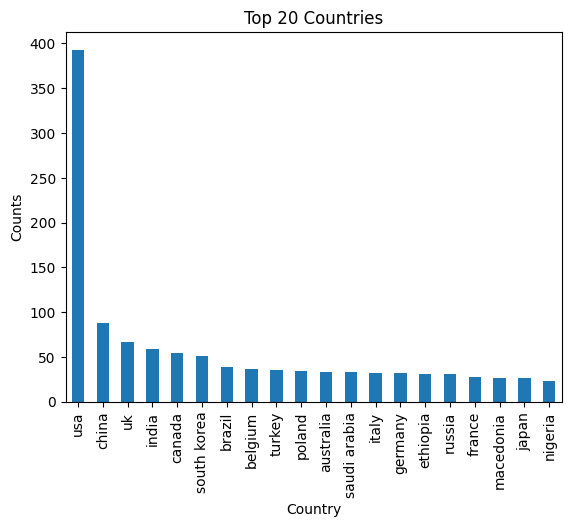

In [13]:
country_counts = df['country'].value_counts()
top_countries = country_counts.head(20)

top_countries.plot(kind='bar')
plt.title('Top 20 Countries')
plt.xlabel('Country')
plt.ylabel('Counts')
plt.show()

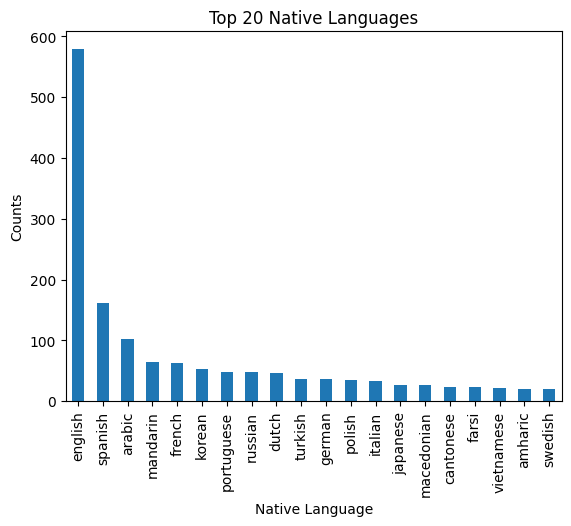

In [14]:
country_counts = df['native_language'].value_counts()
top_countries = country_counts.head(20)

top_countries.plot(kind='bar')
plt.title('Top 20 Native Languages')
plt.xlabel('Native Language')
plt.ylabel('Counts')
plt.show()

In [15]:
sex = df['sex'].value_counts()
sex

sex
male      1121
female    1045
famale       1
Name: count, dtype: int64

In [16]:
df['sex'] = df['sex'].replace('famale', 'female')

([<matplotlib.patches.Wedge at 0x7eaa41c01bd0>,
 [Text(-0.059772390130176156, 1.0983748273600074, 'male'),
  Text(0.05977239013017578, -1.0983748273600074, 'female')],
 [Text(-0.03260312188918699, 0.5991135421963676, '51.7%'),
  Text(0.032603121889186785, -0.5991135421963676, '48.3%')])

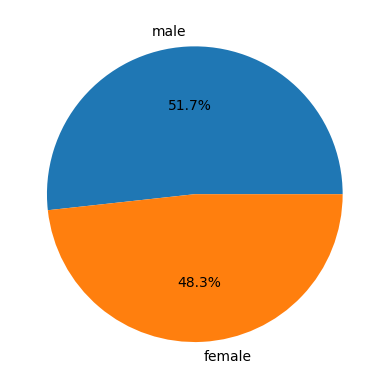

In [17]:
import warnings
warnings.filterwarnings('ignore')
plt.pie(x=df['sex'].value_counts(), labels=df['sex'].value_counts().index, autopct='%1.1f%%')

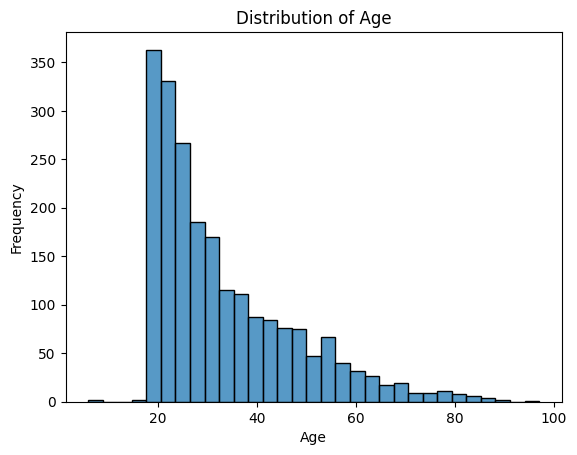

In [18]:
sns.histplot(data=df, x='age')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [19]:
df.duplicated().sum()

0

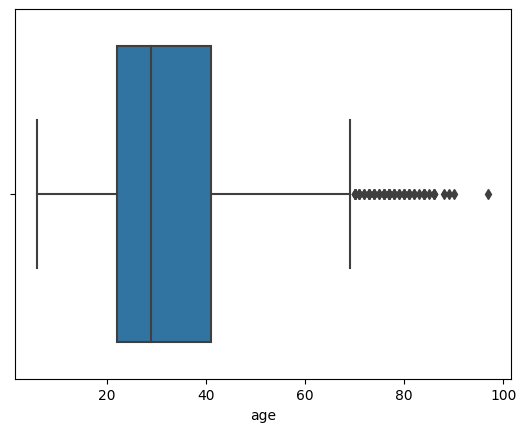

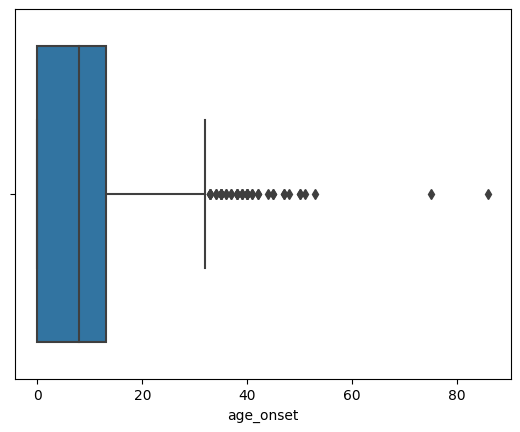

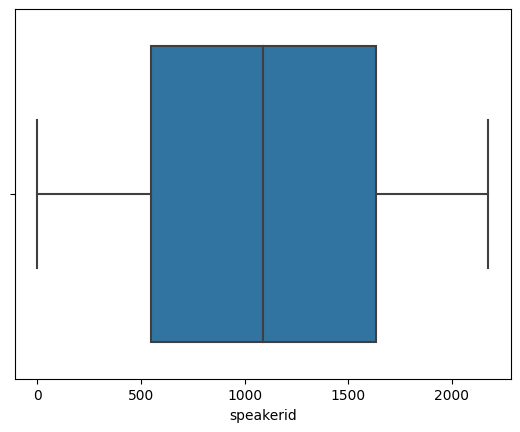

In [20]:
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df, x=i)
    plt.show()

In [21]:
# kita coba pake wisker

def wisker(col):
    q1, q3 = np.percentile(col, (25,75))
    iqr = q3-q1
    lw = q1 - 1.5*iqr
    uw = q3 + 1.5*iqr
    return lw, uw

In [22]:
for i in ['age']:
    lw, uw = wisker(df[i])
    df[i] = np.where(df[i]<lw, lw, df[i])
    df[i] = np.where(df[i]>uw, uw, df[i])

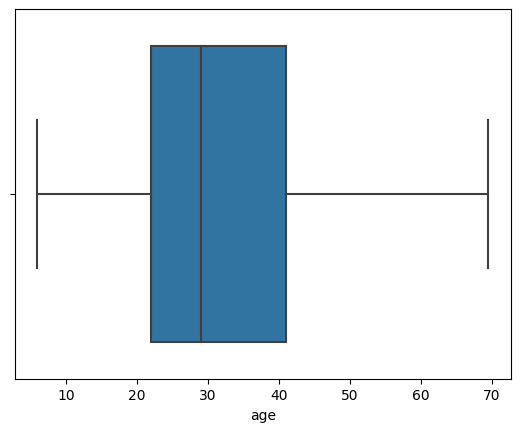

In [23]:
for i in ['age']:
    sns.boxplot(data=df, x=i)
    plt.show()

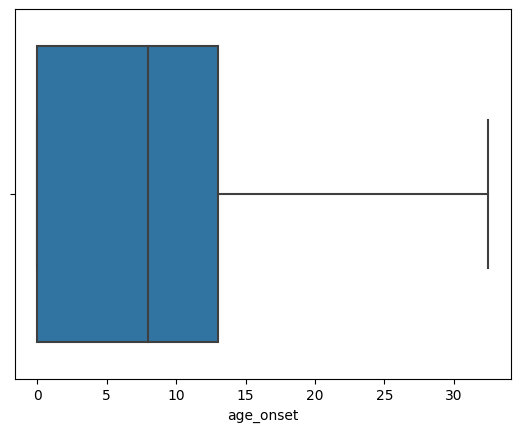

In [24]:
for i in ['age_onset']:
    lw, uw = wisker(df[i])
    df[i] = np.where(df[i]<lw, lw, df[i])
    df[i] = np.where(df[i]>uw, uw, df[i])
    
for i in ['age_onset']:
    sns.boxplot(data=df, x=i)
    plt.show()

In [25]:
audio_path1 = '/kaggle/input/speech-accent-archive/recordings/recordings/afrikaans1.mp3'
Audio(filename=audio_path1)

In [26]:
audio_path2 = '/kaggle/input/speech-accent-archive/recordings/recordings/japanese2.mp3'
Audio(filename=audio_path2)

In [27]:
audio_path3 = '/kaggle/input/speech-accent-archive/recordings/recordings/indonesian5.mp3'
Audio(filename=audio_path3)

# **Feature Extraction**

22050


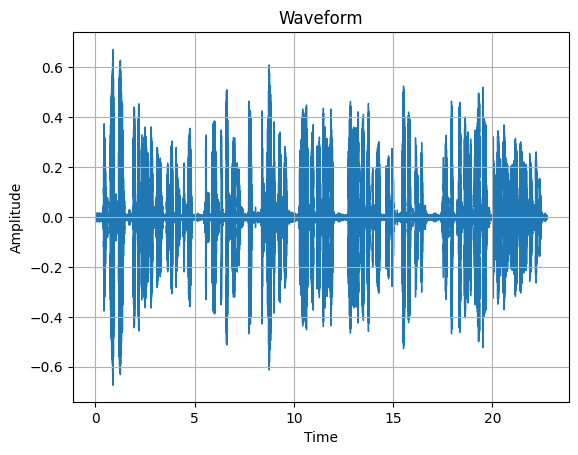

In [28]:
# Waveform
data3, sr = librosa.load(audio_path3)

plt.grid(True)
plt.ylabel('Amplitude')
plt.title("Waveform")
librosa.display.waveshow(data3, sr = sr)
print(sr)

22050


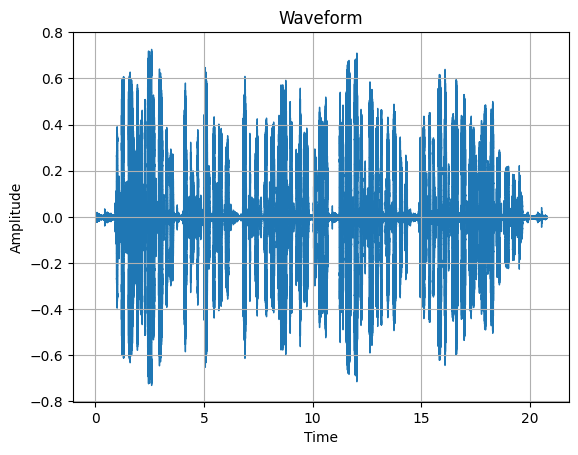

In [29]:
# Waveform
data1, sr = librosa.load(audio_path1)

plt.grid(True)
plt.ylabel('Amplitude')
plt.title("Waveform")
librosa.display.waveshow(data1, sr = sr)
print(sr)

22050


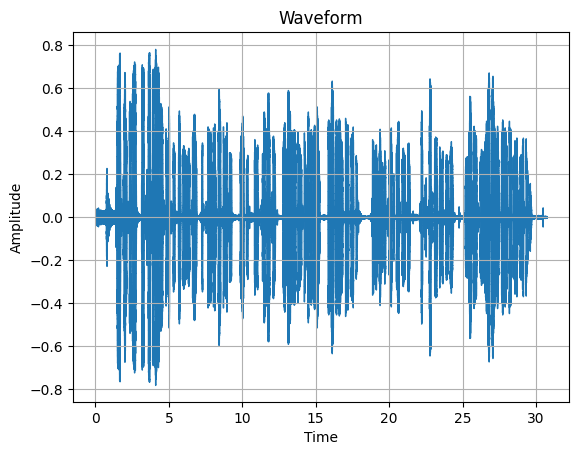

In [30]:
# Waveform
data2, sr = librosa.load(audio_path2)

plt.grid(True)
plt.ylabel('Amplitude')
plt.title("Waveform")
librosa.display.waveshow(data2, sr = sr)
print(sr)

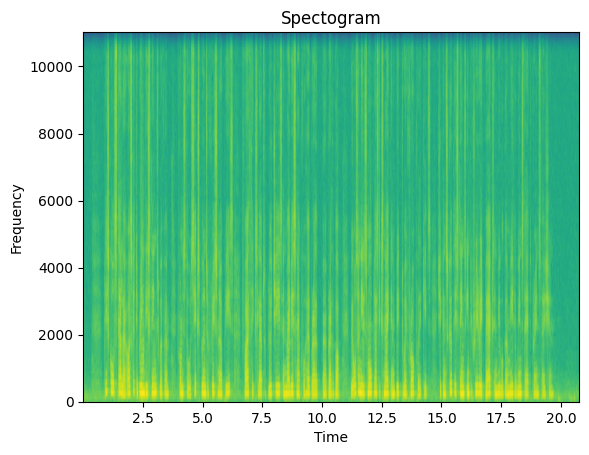

In [31]:
# Spectogram
plt.title("Spectogram")
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.specgram(data1, Fs = sr)
plt.show()

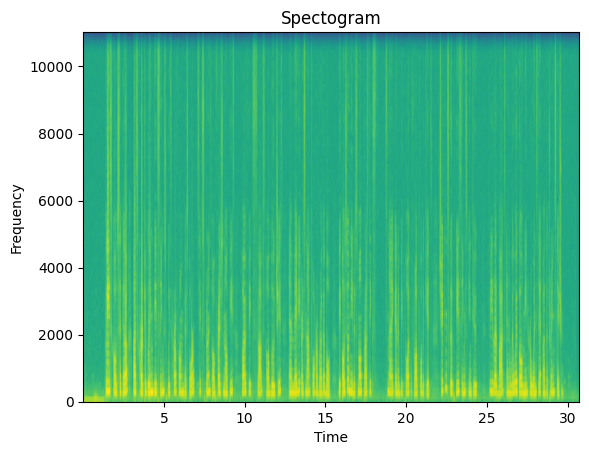

In [32]:
# Spectogram
plt.title("Spectogram")
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.specgram(data2, Fs = sr)
plt.show()

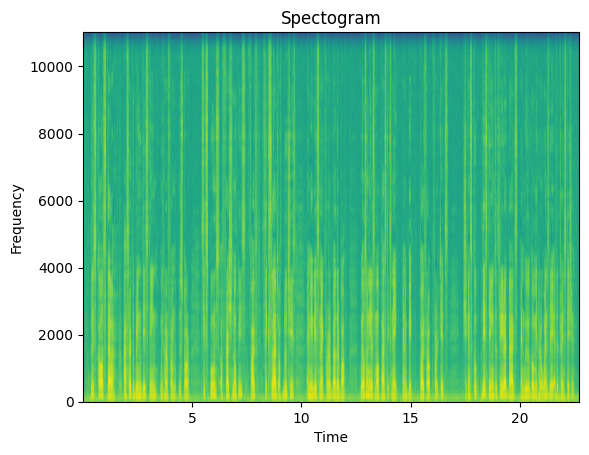

In [33]:
# Spectogram
plt.title("Spectogram")
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.specgram(data3, Fs = sr)
plt.show()

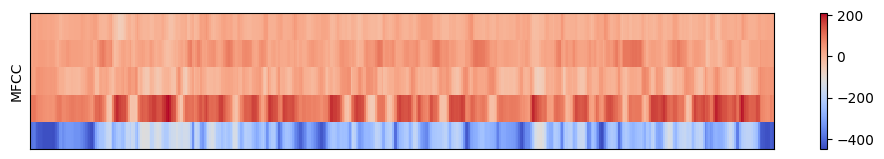

In [34]:
y, sr = librosa.load(audio_path1, sr=sr, duration = 10) # Chop audio at 5 secs... 
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc = 5) # 5 MFCC components

plt.figure(figsize=(12, 6))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

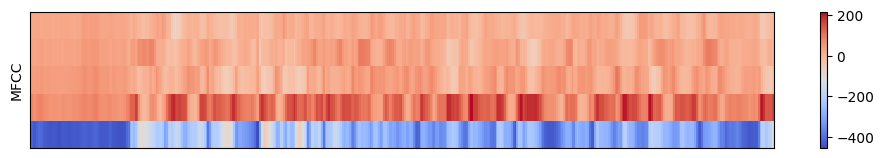

In [35]:
y, sr = librosa.load(audio_path2, sr=sr, duration = 10) # Chop audio at 5 secs... 
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc = 5) # 5 MFCC components

plt.figure(figsize=(12, 6))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

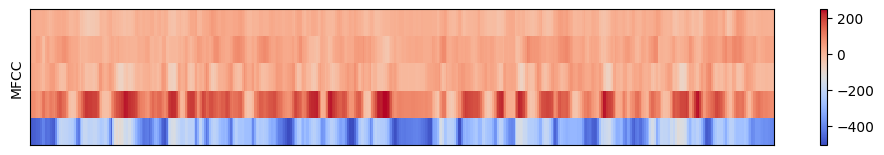

In [36]:
y, sr = librosa.load(audio_path3, sr=sr, duration = 10) # Chop audio at 5 secs... 
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc = 5) # 5 MFCC components

plt.figure(figsize=(12, 6))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

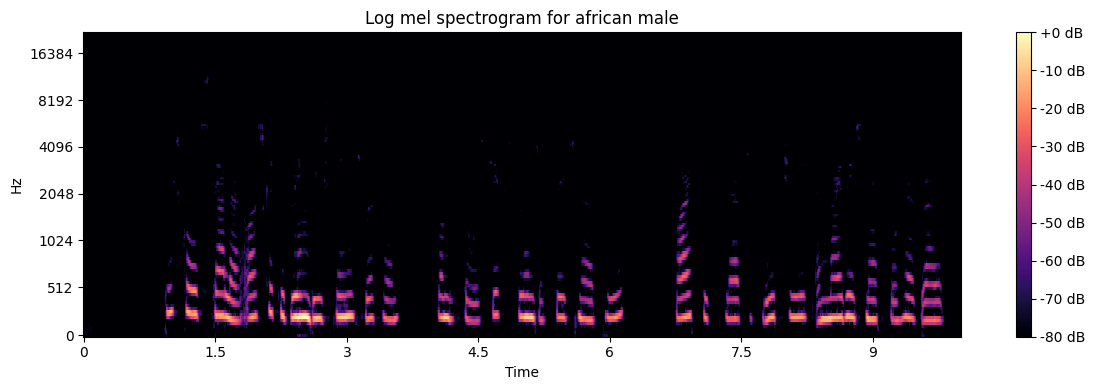

In [37]:
y, sr = librosa.load(audio_path1, sr=None, duration=10)
melspec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
log_S = librosa.amplitude_to_db(melspec, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('Log mel spectrogram for african male')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

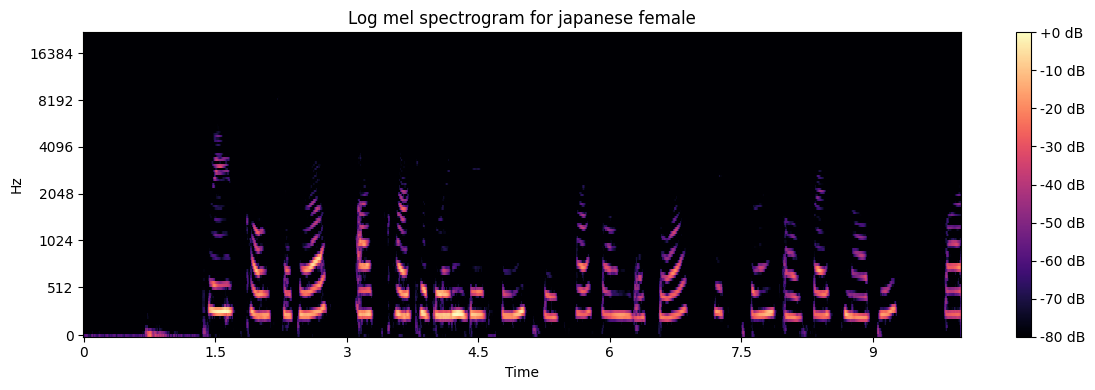

In [38]:
y, sr = librosa.load(audio_path2, sr=None, duration=10)
melspec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
log_S = librosa.amplitude_to_db(melspec, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('Log mel spectrogram for japanese female')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

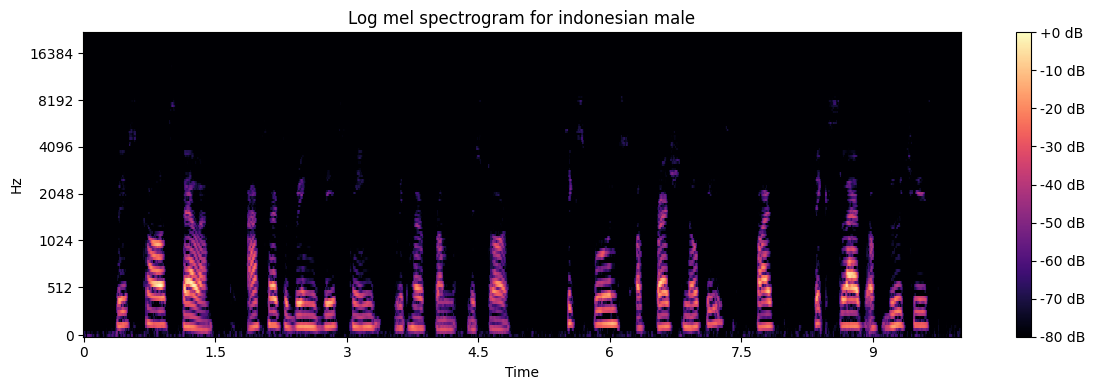

In [39]:
y, sr = librosa.load(audio_path3, sr=None, duration=10)
melspec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
log_S = librosa.amplitude_to_db(melspec, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('Log mel spectrogram for indonesian male')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

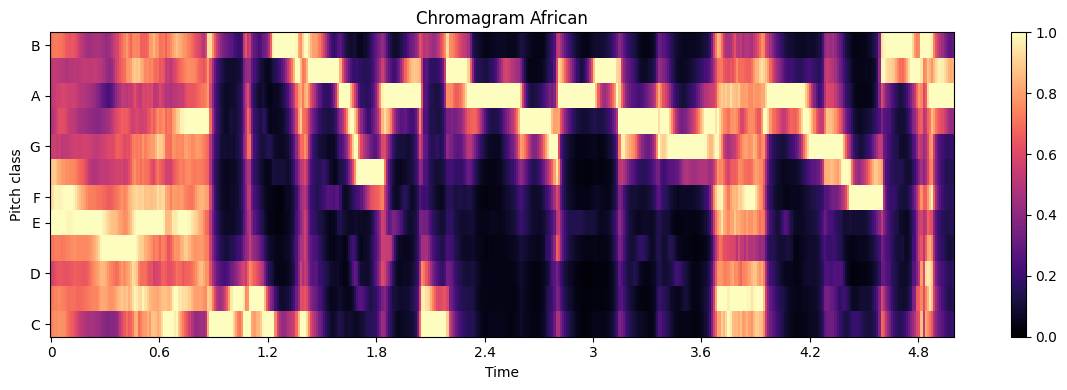

In [40]:
y, sr = librosa.load(audio_path1, sr=sr, duration = 5)
C = librosa.feature.chroma_cqt(y=y, sr=sr)

plt.figure(figsize=(12,4))
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)
plt.title('Chromagram African')
plt.colorbar()
plt.tight_layout()

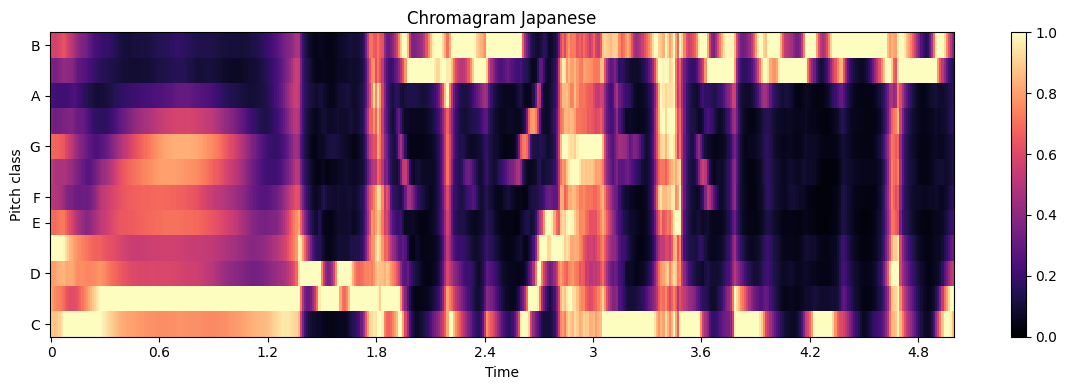

In [41]:
y, sr = librosa.load(audio_path2, sr=sr, duration = 5)
C = librosa.feature.chroma_cqt(y=y, sr=sr)

plt.figure(figsize=(12,4))
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)
plt.title('Chromagram Japanese')
plt.colorbar()
plt.tight_layout()

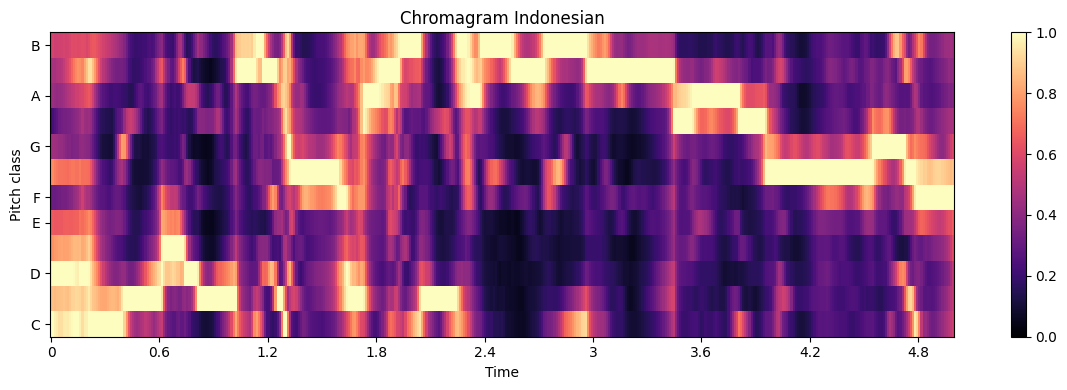

In [42]:
y, sr = librosa.load(audio_path3, sr=sr, duration = 5)
C = librosa.feature.chroma_cqt(y=y, sr=sr)

plt.figure(figsize=(12,4))
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)
plt.title('Chromagram Indonesian')
plt.colorbar()
plt.tight_layout()